<a href="https://colab.research.google.com/github/amithpaul/LemonMelonClassifier/blob/main/LemonMelonClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Extraction

In [99]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/dataset.zip") as zip_ref:
  zip_ref.extractall("")

## Feature Extraction

In [100]:
import os
import cv2

data=[]
basepath='/content/dataset'

def extract_features(im):
  return list(cv2.mean(im))[:3]

for folder in os.scandir(basepath):
  if folder.is_dir():
    for file in os.scandir(folder.path):
      im=cv2.imread(file.path)
      im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
      features=extract_features(im)
      features.append(folder.name)
      data.append(features)

print(data)

[[168.28789925313842, 166.92148021611314, 147.61864373112982, 'melon'], [197.15950814253952, 180.73369238627487, 164.10269439937503, 'melon'], [148.11437037037038, 129.7312, 84.09592098765432, 'melon'], [201.32772732648246, 178.4047279675839, 150.46524047528646, 'melon'], [148.11437037037038, 129.7312, 84.09592098765432, 'melon'], [165.81769965397925, 171.0566920415225, 143.59790726643598, 'melon'], [196.4696317204301, 141.29879569892472, 129.61652688172043, 'melon'], [199.0914880952381, 173.71873015873015, 156.2122222222222, 'melon'], [197.1388400636981, 180.72692446367407, 164.11924238327023, 'melon'], [189.83143399810066, 166.85586815447925, 138.57514245014244, 'melon'], [191.58952649111674, 189.28896335659897, 163.06587087563452, 'melon'], [183.69758646481884, 166.24619744424427, 158.61590341645334, 'melon'], [183.6846496634114, 166.2378011651549, 158.60121150827513, 'melon'], [165.78528442906574, 171.09423944636677, 143.60087474048441, 'melon'], [166.03120987654322, 170.9617185185

In [101]:
import numpy as np
import pandas as pd

df=pd.DataFrame(data,columns=['r','g','b','class'])
df.head()

,r,g,b,class
0,168.287899,166.921480,147.618644,melon
1,197.159508,180.733692,164.102694,melon
2,148.114370,129.731200,84.095921,melon
3,201.327727,178.404728,150.465240,melon
4,148.114370,129.731200,84.095921,melon


## Data Visualization

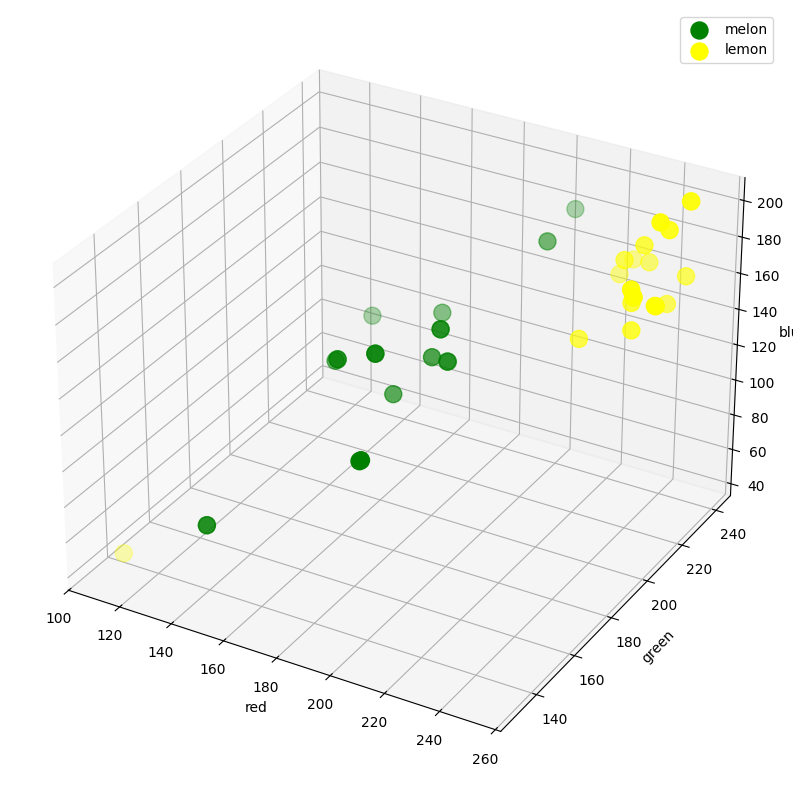

In [102]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

mX=df[df['class']=='melon']
lX=df[df['class']=='lemon']

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection='3d')

ax.scatter(mX['r'],mX['g'],mX['b'],c='green',label='melon',s=150)
ax.scatter(lX['r'],lX['g'],lX['b'],c='yellow',label='lemon',s=150)

ax.legend()
ax.set_xlabel('red')
ax.set_ylabel('green')
ax.set_zlabel('blue')

plt.show()

## Train-Test Split

In [103]:
from sklearn.model_selection import train_test_split

df_rgb=df.iloc[:,:3].values
print(df_rgb)
df_class=df.iloc[:,3].values
print(df_class)

X_train,X_test,Y_train,Y_test = train_test_split(df_rgb,df_class,random_state=42,test_size=0.2)

[[168.28789925 166.92148022 147.61864373]
 [197.15950814 180.73369239 164.1026944 ]
 [148.11437037 129.7312      84.09592099]
 [201.32772733 178.40472797 150.46524048]
 [148.11437037 129.7312      84.09592099]
 [165.81769965 171.05669204 143.59790727]
 [196.46963172 141.2987957  129.61652688]
 [199.0914881  173.71873016 156.21222222]
 [197.13884006 180.72692446 164.11924238]
 [189.831434   166.85586815 138.57514245]
 [191.58952649 189.28896336 163.06587088]
 [183.69758646 166.24619744 158.61590342]
 [183.68464966 166.23780117 158.60121151]
 [165.78528443 171.09423945 143.60087474]
 [166.03120988 170.96171852 143.61999012]
 [167.80424691 185.98696296 154.67926914]
 [201.57220483 178.40579232 150.47182577]
 [216.19443616 224.07205166 198.71262792]
 [196.76813441 141.60847849 129.94942204]
 [217.58591259 207.05540704 196.44030575]
 [233.148176   226.423316   175.492492  ]
 [247.70271111 240.56435556 200.98781111]
 [110.10658718 135.74249379  44.46942871]
 [243.80198208 229.53852865 197.48

## Model Training

In [104]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

mlp=MLPClassifier(hidden_layer_sizes=(64,32),max_iter=1000,random_state=42)
mlp.fit(X_train,Y_train)

rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(X_train,Y_train)

svc=SVC(random_state=42)
svc.fit(X_train,Y_train)

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)


KNeighborsClassifier()

## Metircs

Accuracy Score

In [105]:
from sklearn.metrics import accuracy_score
for model,name in zip([mlp,rfc,svc,knn],['Multi-Layer Perceptron','Random Forest Classifier','SVC','KNN']):
  Y_predict=model.predict(X_test)
  print(name+':',accuracy_score(Y_test,Y_predict),'\n')


Multi-Layer Perceptron: 1.0 

Random Forest Classifier: 0.8888888888888888 

SVC: 0.8888888888888888 

KNN: 0.8888888888888888 



Confusion Matrix

In [106]:
from sklearn.metrics import confusion_matrix
for model,name in zip([mlp,rfc,svc,knn],['Multi-Layer Perceptron','Random Forest Classifier','SVC','KNN']):
  Y_predict=model.predict(X_test)
  print(name+'\n',confusion_matrix(Y_test,Y_predict),'\n')


Multi-Layer Perceptron
 [[5 0]
 [0 4]] 

Random Forest Classifier
 [[5 0]
 [1 3]] 

SVC
 [[5 0]
 [1 3]] 

KNN
 [[5 0]
 [1 3]] 



Classification Report

In [107]:
from sklearn.metrics import classification_report
for model,name in zip([mlp,rfc,svc,knn],['Multi-Layer Perceptron','Random Forest Classifier','SVC','KNN']):
  Y_predict=model.predict(X_test)
  print(name+'\n',classification_report(Y_test,Y_predict),'\n\n')


Multi-Layer Perceptron
               precision    recall  f1-score   support

       lemon       1.00      1.00      1.00         5
       melon       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 


Random Forest Classifier
               precision    recall  f1-score   support

       lemon       0.83      1.00      0.91         5
       melon       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9
 


SVC
               precision    recall  f1-score   support

       lemon       0.83      1.00      0.91         5
       melon       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg 